# FitBit Dataset

### Import llibreries i datasets

In [361]:
# Importem llibreries necessaries
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Intentem predir el total minutes asleep
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import r2_score

In [362]:
#ATENCIO TOT SÓN DADES DIARIES
#
df_activitat = pd.read_csv('../Datasets/FitBit Fitness Tracker/dailyActivity_merged.csv')
df_calories = pd.read_csv('../Datasets/FitBit Fitness Tracker/dailyCalories_merged.csv')
df_intensitat = pd.read_csv('../Datasets/FitBit Fitness Tracker/dailyIntensities_merged.csv')
df_pasos = pd.read_csv('../Datasets/FitBit Fitness Tracker/dailySteps_merged.csv')
df_heart_rate = pd.read_csv('../Datasets/FitBit Fitness Tracker/heartrate_seconds_merged.csv') # tenir en compte
df_sleep = pd.read_csv('../Datasets/FitBit Fitness Tracker/sleepDay_merged.csv')
df_weightlog = pd.read_csv('../Datasets/FitBit Fitness Tracker/weightLogInfo_merged.csv')

## Processem les dades

### Activitat Diaria

In [363]:
df_activitat.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [364]:
df_activitat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

### Calories Diaries

In [365]:
df_calories.head()

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [366]:
df_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   Calories     940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


### Intensitat Diaria

In [367]:
df_intensitat.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


In [368]:
df_intensitat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDay               940 non-null    object 
 2   SedentaryMinutes          940 non-null    int64  
 3   LightlyActiveMinutes      940 non-null    int64  
 4   FairlyActiveMinutes       940 non-null    int64  
 5   VeryActiveMinutes         940 non-null    int64  
 6   SedentaryActiveDistance   940 non-null    float64
 7   LightActiveDistance       940 non-null    float64
 8   ModeratelyActiveDistance  940 non-null    float64
 9   VeryActiveDistance        940 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 73.6+ KB


### Pasos Diaris

In [369]:
df_pasos.head()

,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669


In [370]:
df_pasos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   StepTotal    940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


### Heart Rate Minut?


In [371]:
df_heart_rate.head()


,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [372]:
df_heart_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


### Sleep Diari

In [373]:
df_sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [374]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


### Weight Log Info

In [375]:
df_weightlog.head()

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


In [376]:
df_weightlog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


### Valors nuls

No tindrem en compte el weight log info

In [377]:
null_activitat = df_activitat.isnull().values.sum()
null_calories = df_calories.isnull().values.sum()
null_intensitat = df_intensitat.isnull().values.sum()
null_pasos = df_pasos.isnull().values.sum()
null_heart_rate = df_heart_rate.isnull().values.sum()
null_sleep = df_sleep.isnull().values.sum()

print('Valors nuls Activitat:', null_activitat)
print('Valors nuls Calories:', null_calories)
print('Valors nuls Intensitat:', null_intensitat)
print('Valors nuls Pasos:', null_pasos)
print('Valors nuls Heart Rate:', null_heart_rate)
print('Valors nuls Sleep:', null_sleep)

Valors nuls Activitat: 0
Valors nuls Calories: 0
Valors nuls Intensitat: 0
Valors nuls Pasos: 0
Valors nuls Heart Rate: 0
Valors nuls Sleep: 0


### Posibles valors duplicats

In [378]:
duplicate_activitat = df_activitat.duplicated().values.sum()
duplicate_calories = df_calories.duplicated().values.sum()
duplicate_intensitat = df_intensitat.duplicated().values.sum()
duplicate_pasos = df_pasos.duplicated().values.sum()
duplicate_heart_rate = df_heart_rate.duplicated().values.sum()
duplicate_sleep = df_sleep.duplicated().values.sum()

print('Valors duplicats Activitat:', duplicate_activitat)
print('Valors duplicats Calories:', duplicate_calories)
print('Valors duplicats Intensitat:', duplicate_intensitat)
print('Valors duplicats Pasos:', duplicate_pasos)
print('Valors duplicats Heart Rate:', duplicate_heart_rate)
print('Valors duplicats Sleep:', duplicate_sleep)

### Eliminem els valors duplicats
df_sleep = df_sleep.drop_duplicates()
duplicate_sleep = df_sleep.duplicated().values.sum()
print('Valors duplicats Sleep:', duplicate_sleep)

Valors duplicats Activitat: 0
Valors duplicats Calories: 0
Valors duplicats Intensitat: 0
Valors duplicats Pasos: 0
Valors duplicats Heart Rate: 0
Valors duplicats Sleep: 3
Valors duplicats Sleep: 0


In [379]:
# SHAPE de cada dataset
print('Shape Activitat:', df_activitat.shape)
print('Shape Calories:', df_calories.shape)
print('Shape Intensitat:', df_intensitat.shape)

print('Shape Pasos:', df_pasos.shape)
print('Shape Heart Rate:', df_heart_rate.shape)
print('Shape Sleep:', df_sleep.shape)


Shape Activitat: (940, 15)
Shape Calories: (940, 3)
Shape Intensitat: (940, 10)
Shape Pasos: (940, 3)
Shape Heart Rate: (2483658, 3)
Shape Sleep: (410, 5)


In [380]:
# valors unics id
print('Valors unics id Activitat:', df_activitat['Id'].nunique())
print('Valors unics id Calories:', df_calories['Id'].nunique())
print('Valors unics id Intensitat:', df_intensitat['Id'].nunique())
print('Valors unics id Pasos:', df_pasos['Id'].nunique())
print('Valors unics id Heart Rate:', df_heart_rate['Id'].nunique())
print('Valors unics id Sleep:', df_sleep['Id'].nunique())


Valors unics id Activitat: 33
Valors unics id Calories: 33
Valors unics id Intensitat: 33
Valors unics id Pasos: 33
Valors unics id Heart Rate: 14
Valors unics id Sleep: 24


### DATA AMB LA QUE TRACTAREM

In [381]:
# Normalitzem les dates
df_activitat["ActivityDate"] = pd.to_datetime(df_activitat["ActivityDate"])
df_pasos["ActivityDay"] = pd.to_datetime(df_pasos["ActivityDay"])
df_calories["ActivityDay"] = pd.to_datetime(df_calories["ActivityDay"])
df_sleep["SleepDay"] = pd.to_datetime(df_sleep["SleepDay"])

C:\Users\roger\AppData\Local\Temp\ipykernel_32240\1191279565.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_sleep["SleepDay"] = pd.to_datetime(df_sleep["SleepDay"])


In [382]:
# datatype
print(df_activitat['ActivityDate'].dtypes)
print(df_pasos['ActivityDay'].dtypes)
print(df_calories['ActivityDay'].dtypes)
print(df_sleep['SleepDay'].dtypes)


datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


### MERGE DE CALORIES AMB PASOS


In [383]:
print(df_calories.head())
print(df_pasos.head())

merge_calories_pasos = pd.merge(df_calories, df_pasos, on=['Id', 'ActivityDay'], how='inner')

display(merge_calories_pasos.head())

           Id ActivityDay  Calories
0  1503960366  2016-04-12      1985
1  1503960366  2016-04-13      1797
2  1503960366  2016-04-14      1776
3  1503960366  2016-04-15      1745
4  1503960366  2016-04-16      1863
           Id ActivityDay  StepTotal
0  1503960366  2016-04-12      13162
1  1503960366  2016-04-13      10735
2  1503960366  2016-04-14      10460
3  1503960366  2016-04-15       9762
4  1503960366  2016-04-16      12669


,Id,ActivityDay,Calories,StepTotal
0,1503960366,2016-04-12,1985,13162
1,1503960366,2016-04-13,1797,10735
2,1503960366,2016-04-14,1776,10460
3,1503960366,2016-04-15,1745,9762
4,1503960366,2016-04-16,1863,12669


### OBSERVEM LA RESTA DE DATASETS I MIREM COM PODEM FER UN MERGE

In [384]:
display(df_activitat.head())
display(df_sleep.head())


,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


In [385]:
# Canviem el nom de sleep
df_sleep=df_sleep.rename(columns = {'SleepDay':'ActivityDay'})
df_sleep.head()

,Id,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,1,700,712


,Id,ActivityDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Calories,StepTotal
0,1503960366,2016-04-12,1,327,346,1985,13162
1,1503960366,2016-04-13,2,384,407,1797,10735
2,1503960366,2016-04-15,1,412,442,1745,9762
3,1503960366,2016-04-16,2,340,367,1863,12669
4,1503960366,2016-04-17,1,700,712,1728,9705


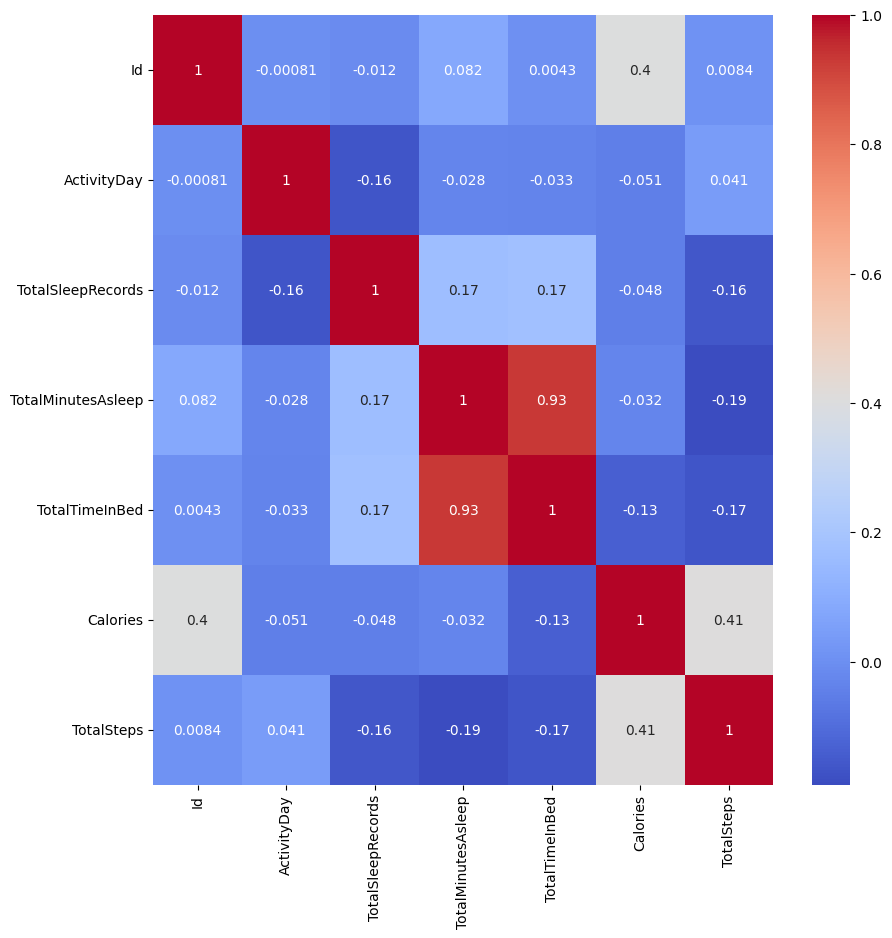

In [386]:
#Fem un merge de tots els datasets a partir de activityday i id
merge_sleep_calories_pasos=pd.merge(df_sleep, merge_calories_pasos, on=['Id', 'ActivityDay'], how='inner')

display(merge_sleep_calories_pasos.head())
#canviem el nom de steptotal a totalsteps
merge_sleep_calories_pasos=merge_sleep_calories_pasos.rename(columns = {'StepTotal':'TotalSteps'})
merge_sleep_calories_pasos.head()

#correlation
correlation = merge_sleep_calories_pasos.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [387]:
# Treiem el total time in bed
merge_sleep_calories_pasos=merge_sleep_calories_pasos.drop(['TotalTimeInBed'], axis=1)

In [388]:
# observem l'activaitat
display(df_activitat.head())
#canviem el nom a activity date
df_activitat=df_activitat.rename(columns = {'ActivityDate':'ActivityDay'})

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


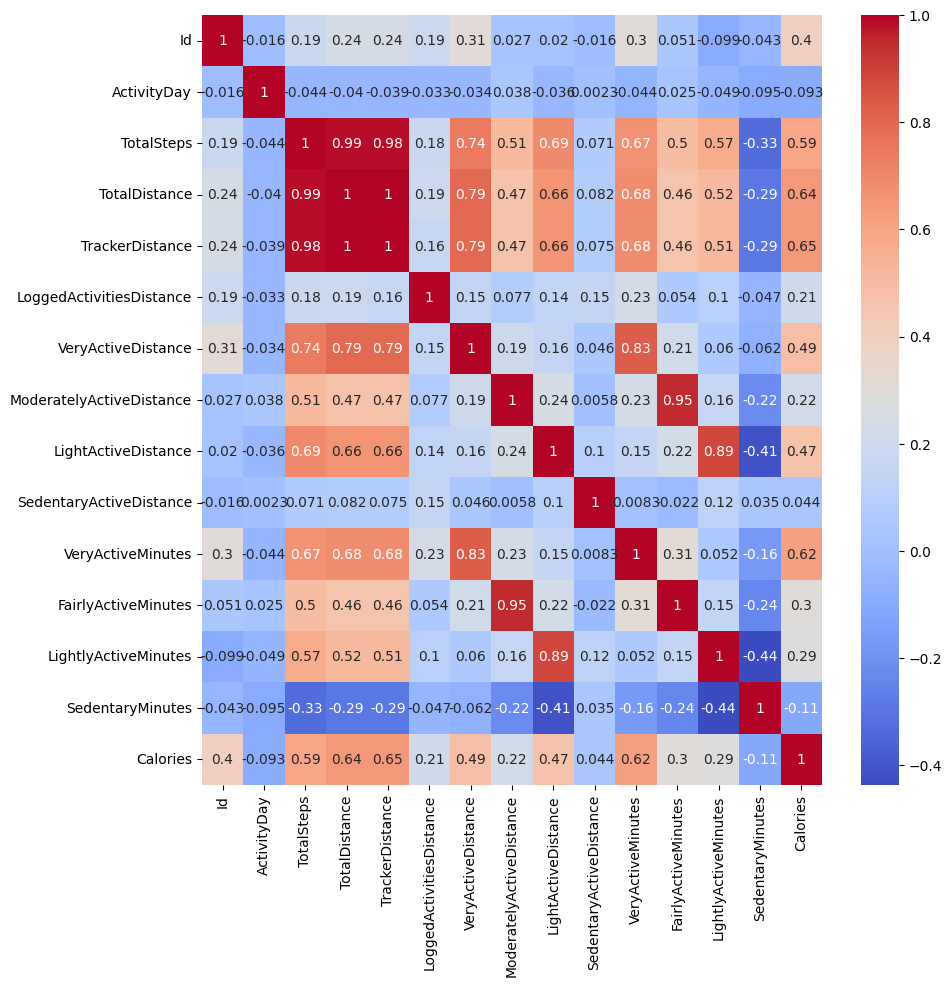

In [389]:
#Mirem la correlació de activity
correlation = df_activitat.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [390]:
#Observem la gran correlacio entre la distancia i tracker distance
df_activitat=df_activitat.drop(['TrackerDistance'], axis=1)
df_activitat=df_activitat.drop(['TotalDistance'], axis=1)
display(df_activitat.head())

,Id,ActivityDay,TotalSteps,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [391]:
df_activitat = df_activitat.drop(['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance'], axis=1)

,Id,ActivityDay,TotalSteps,LoggedActivitiesDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,0.0,36,10,221,773,1863


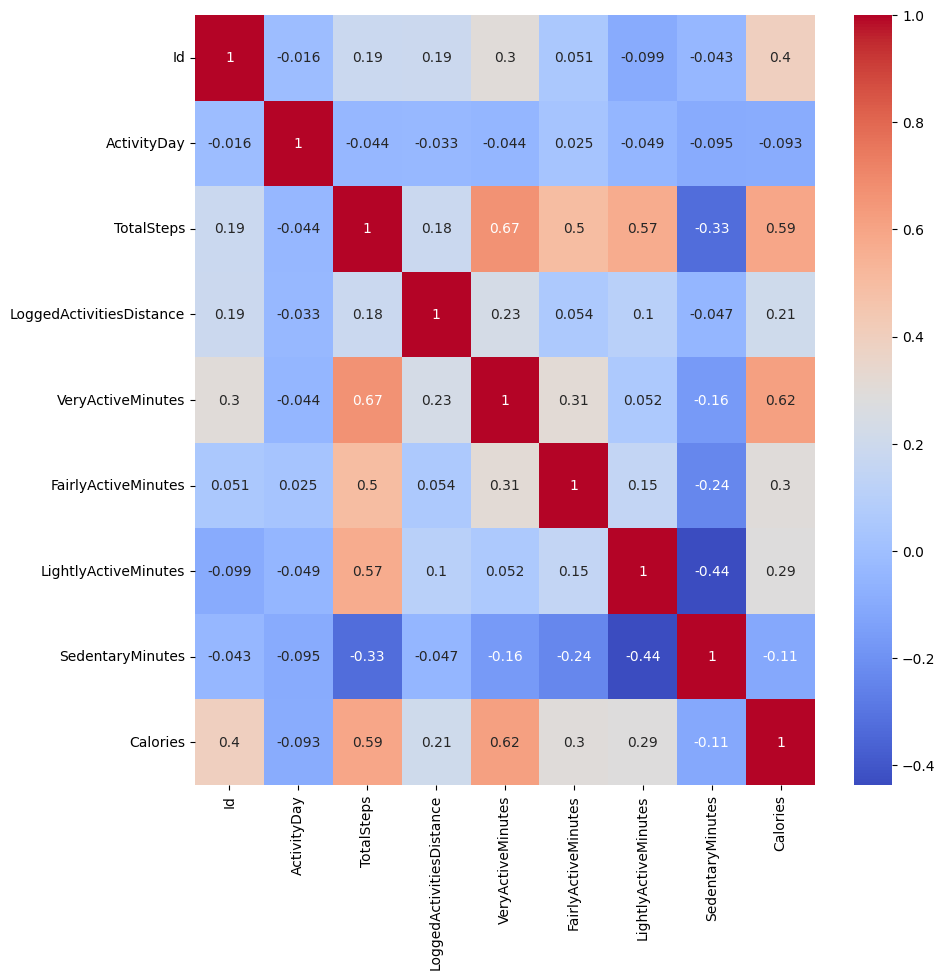

In [392]:
display(df_activitat.head())

# Mirem la correlació de activity després dels drops
correlation = df_activitat.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

### FEM EL MERGE FINAL

In [393]:
#Fem un merge de tots els datasets a partir de activityday i id
merge_final=pd.merge(df_activitat, merge_sleep_calories_pasos, on=['Id', 'ActivityDay', 'TotalSteps', 'Calories'], how='inner')

display(merge_final.head())

,Id,ActivityDay,TotalSteps,LoggedActivitiesDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep
0,1503960366,2016-04-12,13162,0.0,25,13,328,728,1985,1,327
1,1503960366,2016-04-13,10735,0.0,21,19,217,776,1797,2,384
2,1503960366,2016-04-15,9762,0.0,29,34,209,726,1745,1,412
3,1503960366,2016-04-16,12669,0.0,36,10,221,773,1863,2,340
4,1503960366,2016-04-17,9705,0.0,38,20,164,539,1728,1,700


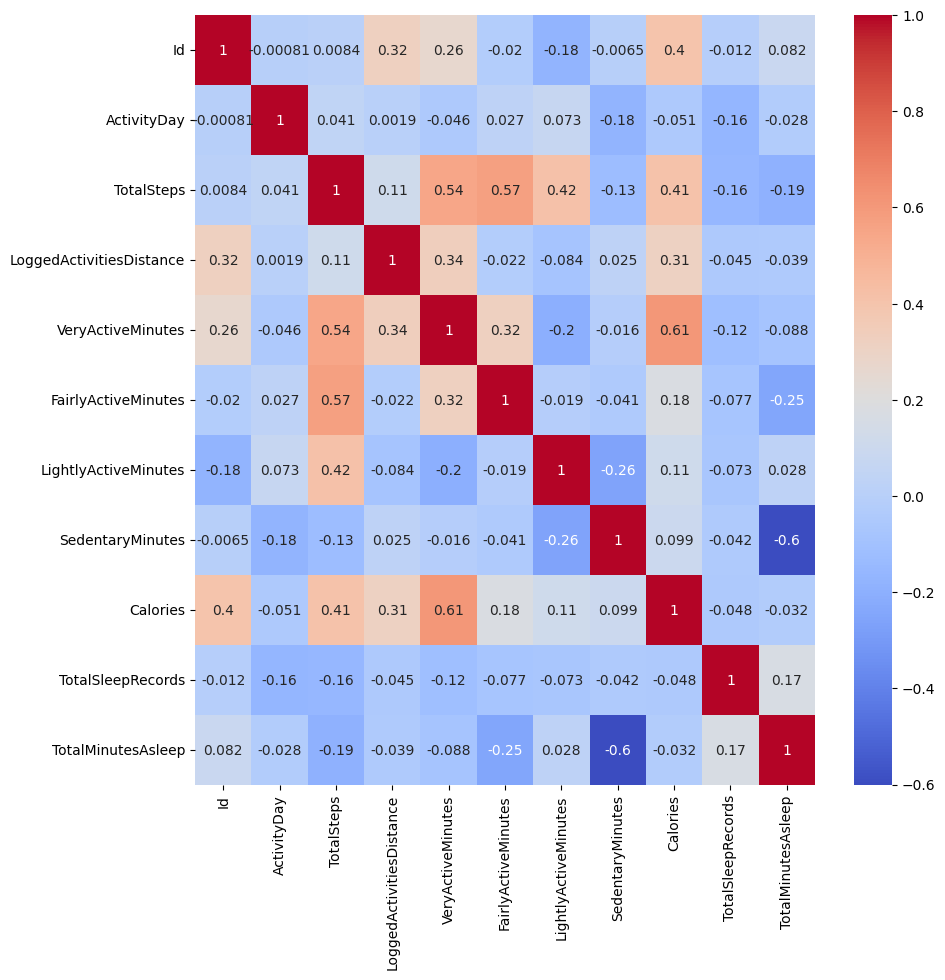

In [394]:
# Mirem la correlació de el merge final
correlation = merge_final.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

# PODRIEM PROVAR DE PREDIR EL TOTAL MINUTES ASLEEP
relacionant la son amb l'exercici fet durant el dia

In [395]:


X = merge_final.drop(['TotalMinutesAsleep', 'Id', 'ActivityDay'], axis=1)

y = merge_final['TotalMinutesAsleep']



In [397]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print('Mean Squared Error:', mse)

#presicion
# Convert y_test and y_pred to integer values for classification report
y_test_class = np.digitize(y_test, bins=np.arange(0, 800, 100))
y_pred_class = np.digitize(y_pred, bins=np.arange(0, 800, 100))

print(classification_report(y_test_class, y_pred_class))

Mean Squared Error: 5411.947230189633
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.17      0.20      0.18         5
           4       0.50      0.57      0.53        23
           5       0.56      0.68      0.61        34
           6       0.67      0.27      0.38        15
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1

    accuracy                           0.50        82
   macro avg       0.24      0.21      0.21        82
weighted avg       0.50      0.50      0.48        82



c:\Users\roger\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\roger\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\roger\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 